In [190]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [191]:
# import needed packages

In [192]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D
from tensorflow.keras.layers import LSTM, Embedding

from tensorflow.keras.models import Model

In [193]:
#data processing

In [194]:
df = pd.read_csv('potentially_abuse_V2.csv',encoding='unicode_escape')

In [195]:
df.head()

,label,selftext,role
0,1,However my stepfather was intoxicated and ass...,perpetrator
1,1,I (27f) have recently escaped an abusive relat...,victim
2,1,Is anyone aware of an online support group for...,victim
3,1,Has anyone had to show up for the abuser__ con...,victim
4,1,There was a fair amount of financial abuse in...,witness


In [196]:
# drop unnecessary columns
df = df.drop(["role"], axis=1)

In [197]:
df.head()

,label,selftext
0,1,However my stepfather was intoxicated and ass...
1,1,I (27f) have recently escaped an abusive relat...
2,1,Is anyone aware of an online support group for...
3,1,Has anyone had to show up for the abuser__ con...
4,1,There was a fair amount of financial abuse in...


In [198]:
# rename columns to something better
df.columns = ['labels', 'data']

In [199]:
df.head()

,labels,data
0,1,However my stepfather was intoxicated and ass...
1,1,I (27f) have recently escaped an abusive relat...
2,1,Is anyone aware of an online support group for...
3,1,Has anyone had to show up for the abuser__ con...
4,1,There was a fair amount of financial abuse in...


In [200]:
df["label_numerics"]= df["labels"]
Y = df["label_numerics"].values

In [201]:
df

,labels,data,label_numerics
0,1,However my stepfather was intoxicated and ass...,1
1,1,I (27f) have recently escaped an abusive relat...,1
2,1,Is anyone aware of an online support group for...,1
3,1,Has anyone had to show up for the abuser__ con...,1
4,1,There was a fair amount of financial abuse in...,1
...,...,...,...
995,0,He told me that he would NEVER lay a finger o...,0
996,0,But he told me that he has a problem with alc...,0
997,0,The first time he Was drunk and I pissed him ...,0
998,1,He dragged me down my hallway into my garage,1


In [202]:
df['b_labels'] = df['labels']
Y = df['b_labels'].values

In [203]:
#TRAIN TEST SPLIT

In [204]:
df_train, df_test,Ytrain, Ytest= train_test_split(df['data'], Y, test_size=0.2)

In [205]:
max_words=5000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df_train)

In [206]:
sequences_train = tokenizer.texts_to_sequences(df_train)
sequences_test= tokenizer.texts_to_sequences(df_test)

In [207]:
sequences_train

[[22,
  8,
  69,
  1113,
  187,
  39,
  6,
  1114,
  29,
  8,
  254,
  255,
  7,
  455,
  48,
  345,
  38,
  346,
  26,
  12,
  104],
 [90,
  80,
  724,
  725,
  13,
  310,
  2,
  726,
  2,
  188,
  90,
  29,
  5,
  74,
  388,
  560,
  9,
  4,
  561,
  562,
  45,
  10,
  5,
  144,
  727],
 [728, 347, 23, 1, 19, 170, 456, 2, 4, 91, 80, 211],
 [212,
  41,
  189,
  21,
  4,
  389,
  256,
  1115,
  41,
  189,
  3,
  5,
  311,
  257,
  13,
  105,
  1116,
  151],
 [20, 117, 18, 563, 3, 1117, 5, 390],
 [7,
  729,
  123,
  202,
  16,
  11,
  110,
  1118,
  7,
  111,
  1119,
  1,
  1120,
  19,
  10,
  24,
  18,
  27,
  1121,
  213,
  26,
  10,
  5,
  1122,
  1123,
  1124,
  2,
  1125,
  16,
  9,
  7,
  564],
 [8, 565, 27, 214, 3, 6, 566, 1, 233, 8, 1126, 348, 8, 11, 27, 21, 5, 1127],
 [20,
  29,
  203,
  567,
  9,
  7,
  130,
  60,
  66,
  2,
  17,
  730,
  1128,
  2,
  190,
  1129,
  258,
  22,
  1130,
  63,
  6],
 [158, 61, 1, 159, 83, 3, 41, 13, 145, 2, 1131, 145, 54, 146, 2, 391, 1132, 6],


In [208]:
sequences_test

[[72, 251, 140, 15, 29, 266, 6, 13, 1050],
 [20, 392, 26, 3, 41, 5, 200, 1790, 382, 1, 553],
 [1, 52, 7, 55, 11, 28, 2, 1, 11, 1437, 22, 51, 664, 43, 125, 320, 5, 2051],
 [8,
  82,
  8,
  445,
  178,
  32,
  283,
  8,
  92,
  2,
  213,
  14,
  1198,
  2,
  1446,
  23,
  1,
  2,
  4,
  142,
  302,
  9,
  7,
  478,
  2,
  57,
  41,
  14,
  5,
  256],
 [184,
  1,
  139,
  23,
  4,
  137,
  2,
  1,
  19,
  25,
  365,
  14,
  32,
  168,
  101,
  40,
  19,
  25,
  1078,
  1518,
  161,
  14,
  32,
  140,
  34],
 [1025,
  1026,
  1027,
  702,
  1668,
  89,
  18,
  288,
  10,
  36,
  2,
  1669,
  139,
  24,
  2011,
  2012],
 [1,
  233,
  1,
  83,
  3,
  631,
  20,
  99,
  36,
  22,
  1,
  174,
  52,
  43,
  16,
  5,
  175,
  45,
  1,
  9,
  4,
  34,
  10,
  945,
  2,
  8,
  14,
  4,
  335,
  3,
  7,
  1010,
  1,
  33,
  3,
  4,
  130,
  66,
  10,
  945,
  45,
  10,
  658,
  2,
  1,
  138,
  3,
  20,
  130,
  66],
 [1, 14, 129, 2, 8, 49, 249, 2, 182, 6, 87],
 [173,
  33,
  5,
  733,
  215,
  13,

In [209]:
tokenizer.word_docs

defaultdict(int,
            {'he': 171,
             'punched': 9,
             'or': 42,
             'ever': 9,
             'his': 55,
             'at': 50,
             'wall': 4,
             'that': 108,
             'the': 234,
             'but': 77,
             'way': 21,
             'anger': 6,
             'anything': 13,
             'never': 27,
             'taken': 6,
             'thrown': 1,
             'out': 68,
             'me': 198,
             'nor': 1,
             'has': 71,
             'definite': 2,
             'with': 122,
             'because': 48,
             'a': 241,
             'triggers': 2,
             'recently': 13,
             'are': 31,
             'routine': 3,
             'family': 18,
             'and': 353,
             'bereavement': 2,
             'big': 5,
             'general': 3,
             'panic': 7,
             'my': 320,
             'change': 3,
             'really': 24,
             'of': 157,
             'ass

In [210]:
V= len(tokenizer.word_docs) # NO OF UNIQUE TOKENS
V

2169

In [211]:
#Pad TRAIN DATA sequences with max length T 

In [212]:
data_train = pad_sequences(sequences_train)

In [213]:
data_train

array([[   0,    0,    0, ...,   26,   12,  104],
       [   0,    0,    0, ...,    5,  144,  727],
       [   0,    0,    0, ...,   91,   80,  211],
       ...,
       [   0,    0,    0, ...,   52,   32,    6],
       [   0,    0,    0, ...,  641,    1,   19],
       [   0,    0,    0, ...,   67,  352, 2169]], dtype=int32)

In [214]:
data_train.shape

(800, 1321)

In [215]:
T= data_train.shape[1]

In [216]:
T

1321

In [217]:
#Pad TEST DATA sequences with max length T

In [218]:
data_test = pad_sequences(sequences_test, maxlen=T)


In [219]:
data_test

array([[   0,    0,    0, ...,    6,   13, 1050],
       [   0,    0,    0, ...,  382,    1,  553],
       [   0,    0,    0, ...,  320,    5, 2051],
       ...,
       [   0,    0,    0, ...,   49,   63,  760],
       [   0,    0,    0, ...,   18,   99,   36],
       [   0,    0,    0, ...,  184,    1,   61]], dtype=int32)

In [220]:
data_train.shape

(800, 1321)

In [221]:
data_test.shape

(200, 1321)

In [222]:
data_train.shape[1]

1321

In [223]:
V= len(tokenizer.word_docs)
T = data_train.shape[1] #features

In [224]:
 #TF SHAPES
#   2000(word_embeddings) x D(just choose dimensions)x  T 162(features)

In [225]:
#THIS IS THE CHANGE FROM RNN

In [226]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Embedding

In [227]:
D=20
#V is full length of the word vector
#T is number of features

i=Input(shape=(T,))

x=Embedding(V+1,D)(i)
print(x)

x=Conv1D(32,3,activation="relu")(x)  #these are industry best numbers from papers
print(x)

x=MaxPooling1D(3)(x)#uses max pooling to reduce information to max 
print(x)

x=Conv1D(64,3,activation="relu")(x)  #these are industry best numbers from papers
print(x)

x=MaxPooling1D(3)(x)#uses max pooling to reduce information to max 
print(x)

x=Conv1D(128,3,activation="relu")(x)  #these are industry best numbers from papers
print(x)

x=MaxPooling1D(3)(x)#uses max pooling to reduce information to max 
print(x)

#Final output with 1 output 1 hence sigmoid
x=Dense(1, activation="sigmoid")(x)
print(x)

model = Model(i,x)


KerasTensor(type_spec=TensorSpec(shape=(None, 1321, 20), dtype=tf.float32, name=None), name='embedding_4/embedding_lookup/Identity_1:0', description="created by layer 'embedding_4'")
KerasTensor(type_spec=TensorSpec(shape=(None, 1319, 32), dtype=tf.float32, name=None), name='conv1d_12/Relu:0', description="created by layer 'conv1d_12'")
KerasTensor(type_spec=TensorSpec(shape=(None, 439, 32), dtype=tf.float32, name=None), name='max_pooling1d_12/Squeeze:0', description="created by layer 'max_pooling1d_12'")
KerasTensor(type_spec=TensorSpec(shape=(None, 437, 64), dtype=tf.float32, name=None), name='conv1d_13/Relu:0', description="created by layer 'conv1d_13'")
KerasTensor(type_spec=TensorSpec(shape=(None, 145, 64), dtype=tf.float32, name=None), name='max_pooling1d_13/Squeeze:0', description="created by layer 'max_pooling1d_13'")
KerasTensor(type_spec=TensorSpec(shape=(None, 143, 128), dtype=tf.float32, name=None), name='conv1d_14/Relu:0', description="created by layer 'conv1d_14'")
KerasT

In [228]:
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1321)]            0         
                                                                 
 embedding_4 (Embedding)     (None, 1321, 20)          43400     
                                                                 
 conv1d_12 (Conv1D)          (None, 1319, 32)          1952      
                                                                 
 max_pooling1d_12 (MaxPoolin  (None, 439, 32)          0         
 g1D)                                                            
                                                                 
 conv1d_13 (Conv1D)          (None, 437, 64)           6208      
                                                                 
 max_pooling1d_13 (MaxPoolin  (None, 145, 64)          0         
 g1D)                                                      

In [229]:
Ytrain = np.asarray(Ytrain).astype('float32').reshape((-1,1))
Ytest = np.asarray(Ytest).astype('float32').reshape((-1,1))

In [230]:
#COMPILE THE MODEL

In [231]:
# Compile and fit
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)
print('Training model...')
r = model.fit(
  data_train,
  Ytrain,
  epochs=10,
  validation_data=(data_test, Ytest)
)

Training model...
Epoch 1/10
25/25 [==============================] - 1s 37ms/step - loss: 0.6929 - accuracy: 0.5162 - val_loss: 0.6942 - val_accuracy: 0.5000
Epoch 2/10
25/25 [==============================] - 1s 32ms/step - loss: 0.6917 - accuracy: 0.5238 - val_loss: 0.6942 - val_accuracy: 0.5000
Epoch 3/10
25/25 [==============================] - 1s 32ms/step - loss: 0.6912 - accuracy: 0.5238 - val_loss: 0.6954 - val_accuracy: 0.5000
Epoch 4/10
25/25 [==============================] - 1s 32ms/step - loss: 0.6907 - accuracy: 0.5238 - val_loss: 0.6947 - val_accuracy: 0.5000
Epoch 5/10
25/25 [==============================] - 1s 33ms/step - loss: 0.6903 - accuracy: 0.5238 - val_loss: 0.6943 - val_accuracy: 0.5000
Epoch 6/10
25/25 [==============================] - 1s 32ms/step - loss: 0.6902 - accuracy: 0.5238 - val_loss: 0.6947 - val_accuracy: 0.5000
Epoch 7/10
25/25 [==============================] - 1s 32ms/step - loss: 0.6902 - accuracy: 0.5238 - val_loss: 0.6948 - val_accuracy: 0.

In [232]:
import matplotlib.pyplot as plt

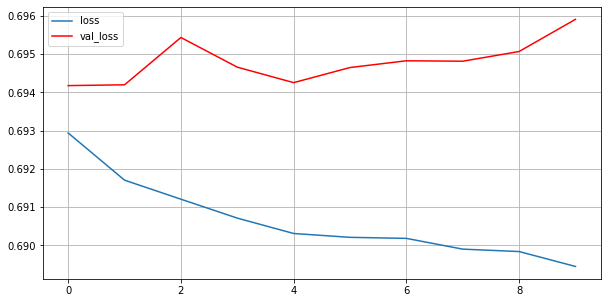

In [233]:
plt.figure(figsize=(10,5))


plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss' , color="red")
plt.grid()
plt.legend()

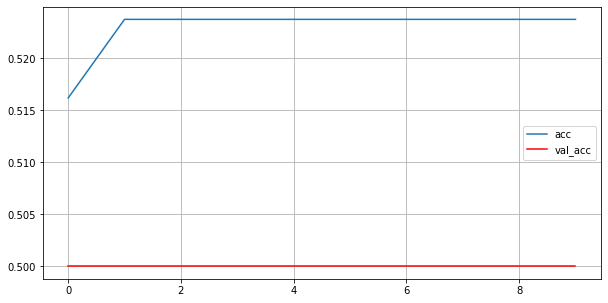

In [234]:
plt.figure(figsize=(10,5))

plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc',color="red")
plt.grid()
plt.legend()

In [183]:
#LETS PREDICT IT .. FUN PART

In [184]:
#Reset the index in test data

In [235]:
df_test

800     Since month 2 she has threatened me with degr...
541    This turned out to be a bit longer than I expe...
973     I know the relationship was abusive and I was...
877      He said he felt bad about everything he did ...
701     Should I leave?   So my boyfriend [ 29M ] and...
                             ...                        
223     I also found out he only stopped beating her ...
75     com/r/domesticviolence/comments/pi0lwy/im_27f_...
317    My new boyfriend saw his father regularly beat...
270    CA- My neighbor next door is experiencing dome...
493                                    What should I do?
Name: data, Length: 200, dtype: object

In [236]:
df_test2=df_test.reset_index()

In [237]:
df_test2=df_test2.drop(columns=["index"])

In [238]:
df_test2.shape

(200, 1)

In [239]:
#exploration
instance=38

In [240]:
df_test2.loc[instance]

data     I had never been on a yacht &amp; didn't want...
Name: 38, dtype: object

In [241]:
df_test2.loc[instance][0]

" I had never been on a yacht &amp; didn't want to turn it down"

In [242]:
Ytest.shape

(200, 1)

In [243]:
Ytest[instance]

array([0.], dtype=float32)

In [244]:
#indexes for all the spam

In [250]:
np.where(Ytest==1)

(array([  2,   5,   6,   7,  12,  14,  15,  18,  21,  23,  25,  26,  27,
         28,  29,  31,  32,  33,  34,  35,  39,  40,  42,  44,  46,  49,
         50,  52,  53,  54,  56,  57,  60,  61,  63,  64,  65,  66,  68,
         69,  70,  71,  73,  74,  78,  79,  80,  81,  83,  85,  89,  90,
         91,  92,  95, 101, 102, 104, 108, 112, 113, 114, 115, 116, 117,
        120, 123, 126, 128, 133, 134, 136, 137, 138, 139, 141, 143, 150,
        152, 154, 157, 163, 164, 165, 166, 167, 169, 171, 176, 178, 184,
        186, 189, 192, 193, 194, 195, 196, 197, 198]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

In [251]:
Ytest[instance]

array([0.], dtype=float32)

In [255]:
df_test2.loc[1]

data    This turned out to be a bit longer than I expe...
Name: 1, dtype: object

In [256]:
#LETS TRY ANOTHER

In [258]:
Ytest[26]

array([1.], dtype=float32)

In [259]:
[df_test2.loc[26][0]]

[' they learned about his horrible physical and emotional abuse after reading through the restraining order i filed']

In [262]:
test_token=pad_sequences(tokenizer.texts_to_sequences([df_test2.loc[26][0]]),maxlen=162)